W pliku **wbo_lista_glosow_2019.csv** znajdziesz dane o głosach oddanych w ramach Wrocławskiego Budżetu Obywatelskiego, pobrane ze strony [Wrocław Otwarte Dane](https://www.wroclaw.pl/open-data/dataset/wroclawski-budzet-obywatelski-glosowanie).

Odczytaj te dane i wyświetl histogram wieku głosujących - wyświetl słupki obejmujące 5-letnie zakresy: głosujący w wieku od 18 do 23 lat, od 24 do 28 lat, itd (do 100 lat - zakładamy że jest to maksymalny wiek głosujących).

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

In [4]:
df = pd.read_csv(os.path.join("..", "01_Dane do wykresów", "wbo_lista_glosow_2019.csv"), sep=";")

In [5]:
df.head()

,Lp,Data,Wiek,Plec,Kod_Pocztowy,Zrodlo,Osiedlowy,Ponadosiedlowy
0,1,"9:01:21, 20-09-2019",33,K,54-117,I,256,132
1,2,"9:01:32, 20-09-2019",38,K,54-131,I,323,255
2,3,"9:02:28, 20-09-2019",32,K,54-107,I,256,132
3,4,"9:02:44, 20-09-2019",36,M,53-339,I,4,5
4,5,"9:02:51, 20-09-2019",31,M,50-231,I,108,120


In [6]:
df.sample(10)

,Lp,Data,Wiek,Plec,Kod_Pocztowy,Zrodlo,Osiedlowy,Ponadosiedlowy
6060,6061,"18:46:08, 20-09-2019",29,K,50-231,I,399,82
45944,45945,"8:20:23, 03-10-2019",77,K,54-440,I,323,261
76550,76551,"20:23:41, 07-10-2019",19,K,51-200,I,370,378
8435,8436,"9:51:46, 21-09-2019",41,K,51-677,I,371,60
74993,74994,"19:20:27, 07-10-2019",58,K,50-437,I,402,5
43462,43463,"11:35:47, 02-10-2019",24,K,50-430,I,402,3
62410,62411,"19:49:04, 06-10-2019",80,M,54-436,I,225,194
68541,68542,"10:05:46, 07-10-2019",40,K,52-437,I,366,234
37065,37066,"10:25:29, 30-09-2019",60,M,51-520,I,175,415
60700,60701,"17:46:15, 06-10-2019",33,M,54-106,I,256,132


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83011 entries, 0 to 83010
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Lp              83011 non-null  int64 
 1   Data            83011 non-null  object
 2   Wiek            83011 non-null  int64 
 3   Plec            83011 non-null  object
 4   Kod_Pocztowy    83009 non-null  object
 5   Zrodlo          83011 non-null  object
 6   Osiedlowy       83011 non-null  int64 
 7   Ponadosiedlowy  83011 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 5.1+ MB


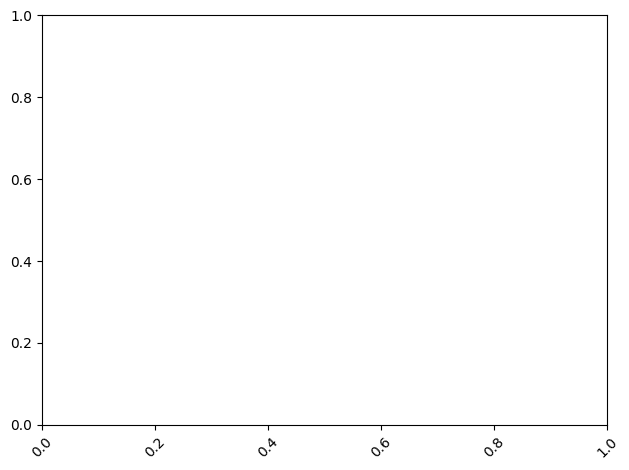

In [11]:
fig, ax = plt.subplots()









plt.xticks(rotation=45)

plt.tight_layout()
plt.show()